In [8]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000126079 | 0.999467  | 0.999823 |
| recall__class_0    | 0.996993 | 0.000786017 | 0.99548   | 0.997871 |
| f1-score__class_0  | 0.998326 | 0.000420209 | 0.997558  | 0.998846 |
| precision__class_1 | 0.129045 | 0.0546217   | 0.0576923 | 0.225806 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.20799  | 0.0832824   | 0.1       | 0.35     |
| accuracy           | 0.996659 | 0.000837308 | 0.995129  | 0.997695 |
| auc                | 0.943784 | 0.0440374   | 0.865928  | 0.998103 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


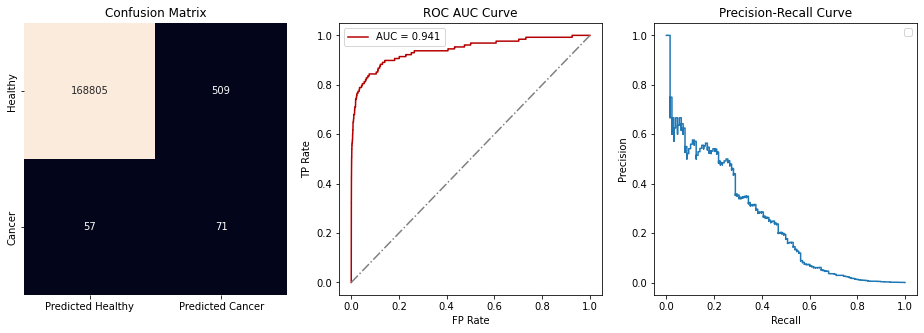

In [9]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


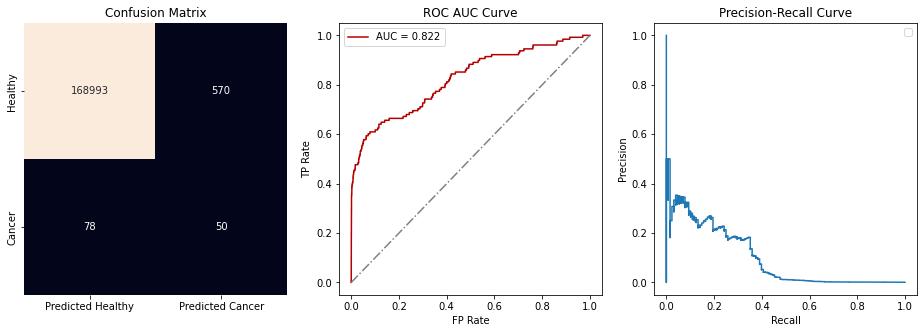

In [10]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [11]:
single_cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = f'cancer_in_next_1_years'))

249




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000125923 | 0.999468  | 0.999823 |
| recall__class_0    | 0.996956 | 0.000758255 | 0.995485  | 0.997699 |
| f1-score__class_0  | 0.998308 | 0.000404141 | 0.99756   | 0.998718 |
| precision__class_1 | 0.126532 | 0.051195    | 0.0576923 | 0.205882 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.204843 | 0.079166    | 0.1       | 0.325581 |
| accuracy           | 0.996623 | 0.000805255 | 0.995134  | 0.997441 |
| auc                | 0.943736 | 0.0440342   | 0.865937  | 0.998094 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


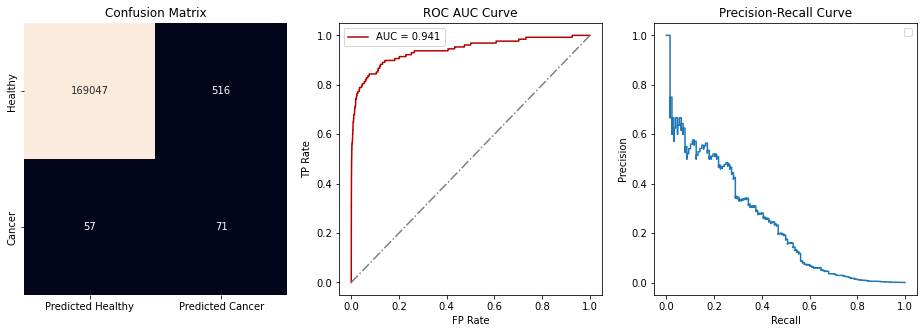

In [12]:
single_cv_analytics_util.update_thresholds(0.5)
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

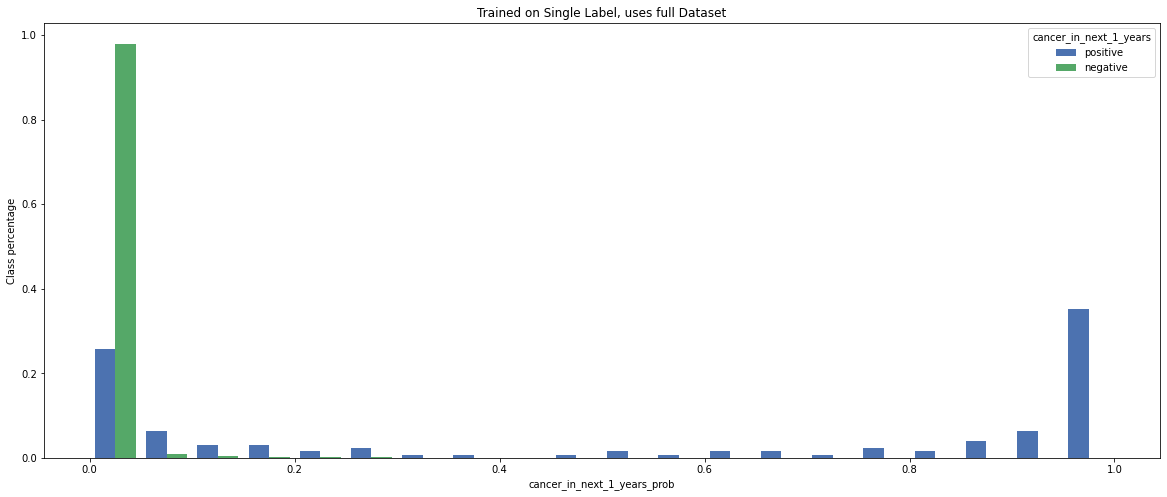

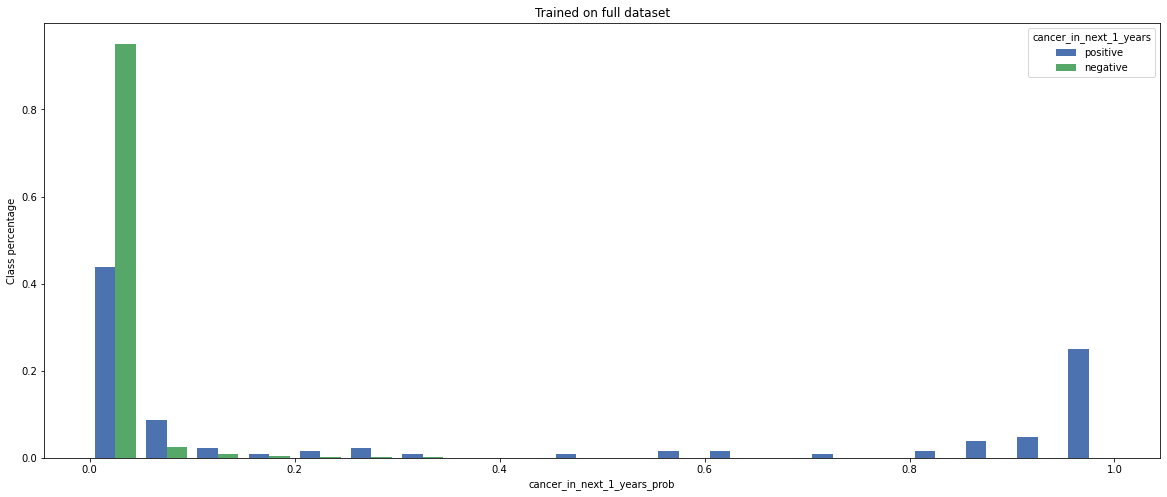

In [13]:

full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on full dataset')

# full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')